<a href="https://colab.research.google.com/github/Kumarraja25/DL/blob/main/ANN(with_hidden_layers)_11_07_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ANN with hidden layers

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from matplotlib import pyplot as plt

## Make training and testing sets fit for model creation

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
x_train=x_train/255
x_test=x_test/255
x_train_flat=x_train.reshape(60000,28*28)
x_test_flat=x_test.reshape(10000,28*28)
print(x_train_flat.shape)
print(x_test_flat.shape)

(60000, 784)
(10000, 784)


## Create, plot, compile, fit and evaluate ANN Model with layers

In [7]:
ann=Sequential()
ann.add(Flatten(input_shape=(28,28)))
ann.add(Dense(128,activation='relu'))
ann.add(Dense(64,activation='relu'))
ann.add(Dense(64,activation='relu'))
ann.add(Dense(10,activation='sigmoid'))

ann.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 113546 (443.54 KB)
Trainable params: 113546 (443.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


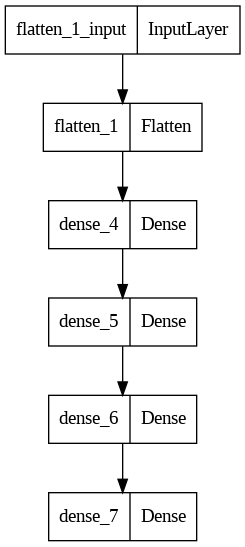

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(ann)

In [14]:
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
ann.fit(x_train,y_train,batch_size=128,epochs=10)


Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 1.1667 - accuracy: 0.6083
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.5369 - accuracy: 0.8404
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.4159 - accuracy: 0.8793
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3427 - accuracy: 0.8998
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3000 - accuracy: 0.9118
Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2688 - accuracy: 0.9209
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2456 - accuracy: 0.9276
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2244 - accuracy: 0.9344
Epoch 9/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2041 - accuracy: 0.9398
Epoch 10/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1864 - accuracy: 0.9452

In [16]:
score=ann.evaluate(x_test,y_test)
print('loss =',score[0])
print('accuracy =',score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1815 - accuracy: 0.9464
loss = 0.18147508800029755
accuracy = 0.946399986743927


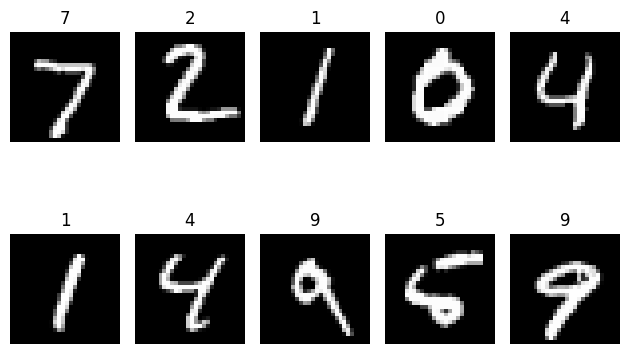

In [18]:
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_test[i],cmap='gray')
  plt.title(y_test[i])
  plt.axis('off')
plt.tight_layout()
plt.show()

## Predict the classes

In [19]:
pred_classes=ann.predict(x_test)
print(pred_classes)
pred_classes.shape

313/313 [==============================] - 1s 2ms/step
[[8.06795359e-02 2.72208010e-03 8.97229135e-01 ... 9.99555469e-01
  4.90006022e-02 2.57100135e-01]
 [4.63716239e-01 1.08194314e-01 9.99935031e-01 ... 6.34921435e-07
  6.86991513e-01 2.85803242e-10]
 [1.16332718e-04 9.94549751e-01 3.32964867e-01 ... 1.41000599e-01
  3.53682041e-01 3.86473630e-03]
 ...
 [1.06849405e-03 9.42363637e-04 2.13622837e-03 ... 5.92312552e-02
  7.60044158e-01 9.56779182e-01]
 [1.77859366e-02 4.46958750e-01 1.39823603e-03 ... 7.11967857e-07
  9.68268275e-01 1.98236108e-02]
 [9.23042178e-01 4.41973651e-04 9.25954878e-01 ... 9.87906674e-07
  3.38392735e-01 3.16837977e-05]]


(10000, 10)

In [22]:
import numpy as np
y_predicted_labels=[np.argmax(i) for i in pred_classes]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

Text(70.72222222222221, 0.5, 'Truth')

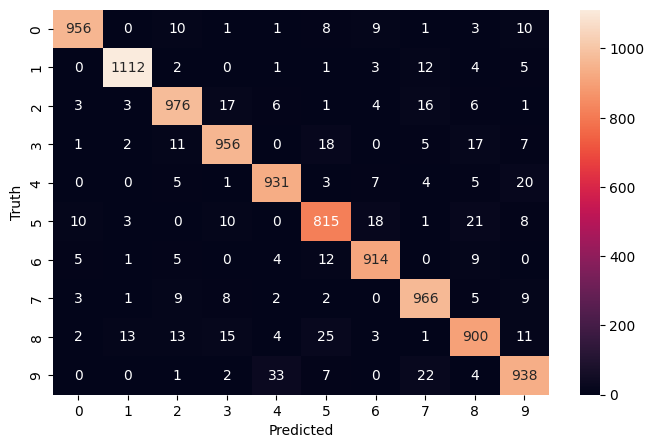

In [24]:
plt.figure(figsize=(8,5))
import seaborn as sns
cm=tf.math.confusion_matrix(y_predicted_labels,y_test)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')